#### Data Cleaning Gender Inequality Index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_gii = pd.read_csv("HDR23-24_Composite_indices_complete_time_series.csv", encoding='latin1')
df_gii

,iso3,country,hdicode,region,hdi_rank_2022,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,pop_total_2013,pop_total_2014,pop_total_2015,pop_total_2016,pop_total_2017,pop_total_2018,pop_total_2019,pop_total_2020,pop_total_2021,pop_total_2022
0,AFG,Afghanistan,Low,SA,182.0,0.284,0.292,0.299,0.307,0.300,...,31.541208,32.716210,33.753499,34.636207,35.643417,36.686784,37.769498,38.972231,40.099462,41.128771
1,ALB,Albania,High,ECA,74.0,0.649,0.632,0.616,0.618,0.623,...,2.887014,2.884102,2.882480,2.881063,2.879355,2.877013,2.873883,2.866849,2.854710,2.842321
2,DZA,Algeria,High,AS,93.0,0.593,0.596,0.601,0.602,0.603,...,38.000627,38.760168,39.543154,40.339329,41.136546,41.927007,42.705368,43.451666,44.177968,44.903225
3,AND,Andorra,Very High,NaN,35.0,NaN,NaN,NaN,NaN,NaN,...,0.071366,0.071622,0.071746,0.072540,0.073836,0.075013,0.076343,0.077700,0.079034,0.079824
4,AGO,Angola,Medium,SSA,150.0,NaN,NaN,NaN,NaN,NaN,...,26.147002,27.128336,28.127721,29.154746,30.208628,31.273533,32.353588,33.428486,34.503774,35.588987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,ZZG.ECA,Europe and Central Asia,NaN,NaN,NaN,0.663,0.660,0.654,0.650,0.646,...,234.825401,237.279742,239.778976,242.142492,244.135198,245.715346,247.230900,248.627951,249.859632,247.791584
202,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,NaN,0.637,0.642,0.646,0.650,0.655,...,605.055728,611.510016,617.905054,624.225911,630.391565,636.273438,641.826122,646.831902,651.100945,655.268078
203,ZZI.SA,South Asia,NaN,NaN,NaN,0.444,0.448,0.454,0.458,0.462,...,1810.142830,1833.991975,1857.336021,1880.378880,1903.436594,1926.062367,1948.009380,1969.617892,1989.452478,2007.549714
204,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,NaN,0.404,0.408,0.407,0.409,0.411,...,906.292042,931.231681,956.799811,982.521965,1008.377044,1035.029964,1062.372696,1090.363459,1118.480023,1146.742474


In [3]:
import re
# Filter columns that match the pattern "gii_" followed by a year and keep additional columns
year_pattern = re.compile(r'gii_\d{4}')
keep_columns = ['iso3', 'country', 'region'] + [col for col in df_gii.columns if year_pattern.match(col)]
df_gii_filtered = df_gii[keep_columns]

# Rename columns that match the pattern "gii_year" to just "year"
df_gii_filtered.rename(columns=lambda x: re.sub(r'gii_(\d{4})', r'\1', x), inplace=True)

df_gii_filtered

C:\Users\leona\AppData\Local\Temp\ipykernel_33724\4272794471.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gii_filtered.rename(columns=lambda x: re.sub(r'gii_(\d{4})', r'\1', x), inplace=True)


,iso3,country,region,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFG,Afghanistan,SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.712,0.692,0.692,0.688,0.681,0.678,0.676,0.674,0.653,0.665
1,ALB,Albania,ECA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.191,0.186,0.178,0.161,0.145,0.139,0.131,0.129,0.117,0.116
2,DZA,Algeria,AS,NaN,NaN,NaN,NaN,NaN,0.673,0.662,...,0.422,0.417,0.409,0.407,0.417,0.405,0.397,0.396,0.457,0.460
3,AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.549,0.553,0.548,0.543,0.547,0.537,0.533,0.529,0.529,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,ZZG.ECA,Europe and Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.284,0.275,0.270,0.260,0.245,0.239,0.230,0.233,0.227,0.224
202,ZZH.LAC,Latin America and the Caribbean,NaN,0.554,0.544,0.535,0.534,0.528,0.520,0.514,...,0.419,0.413,0.408,0.404,0.401,0.394,0.390,0.395,0.390,0.386
203,ZZI.SA,South Asia,NaN,0.704,0.704,0.706,0.708,0.708,0.707,0.702,...,0.545,0.542,0.525,0.521,0.519,0.518,0.504,0.486,0.484,0.478
204,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.592,0.589,0.585,0.583,0.580,0.579,0.578,0.571,0.567,0.565


In [4]:
# Identify year columns
year_cols = [col for col in df_gii_filtered.columns if col.isdigit()]

# Drop rows that have NaNs only in the year columns
df_gii_filtered = df_gii_filtered.dropna(subset=year_cols, how='all')
df_gii_filtered.columns

Index(['iso3', 'country', 'region', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')

In [5]:
# Define the year columns
year_columns = [col for col in df_gii_filtered.columns if col.isdigit()]

# Drop rows where all year columns have NaN values
df_gii_filtered_cleaned = df_gii_filtered.dropna(subset=year_columns, how='all')

# Display the result
print(f"Number of rows before cleaning: {df_gii_filtered.shape[0]}")
print(f"Number of rows after cleaning: {df_gii_filtered_cleaned.shape[0]}")

Number of rows before cleaning: 177
Number of rows after cleaning: 177


In [6]:
# Interpolate missing values in year columns
df_gii_filtered_cleaned[year_columns] = df_gii_filtered_cleaned[year_columns].interpolate(
    method='linear', axis=0, limit_direction='both'
)
# Drop the 'region' column
# df_gii_filtered_cleaned = df_gii_filtered_cleaned.drop(columns=['region','iso3'])

# Verify if there are still NaN values
missing_after_interpolation = df_gii_filtered_cleaned[year_columns].isna().sum().sum()
print(f"Number of remaining NaN values after interpolation: {missing_after_interpolation}")
df_gii_filtered_cleaned

Number of remaining NaN values after interpolation: 0


,iso3,country,region,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFG,Afghanistan,SA,0.4890,0.453000,0.452000,0.444000,0.446000,0.6730,0.662000,...,0.712,0.692,0.692,0.688,0.681,0.678,0.676,0.674,0.653,0.665
1,ALB,Albania,ECA,0.4890,0.453000,0.452000,0.444000,0.446000,0.6730,0.662000,...,0.191,0.186,0.178,0.161,0.145,0.139,0.131,0.129,0.117,0.116
2,DZA,Algeria,AS,0.4890,0.453000,0.452000,0.444000,0.446000,0.6730,0.662000,...,0.422,0.417,0.409,0.407,0.417,0.405,0.397,0.396,0.457,0.460
4,AGO,Angola,SSA,0.4890,0.453000,0.452000,0.444000,0.446000,0.5590,0.546000,...,0.549,0.553,0.548,0.543,0.547,0.537,0.533,0.529,0.529,0.520
6,ARG,Argentina,LAC,0.4890,0.453000,0.452000,0.444000,0.446000,0.4450,0.430000,...,0.356,0.349,0.340,0.337,0.325,0.303,0.291,0.303,0.296,0.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,ZZG.ECA,Europe and Central Asia,NaN,0.5240,0.514714,0.506143,0.505429,0.499857,0.5730,0.571667,...,0.284,0.275,0.270,0.260,0.245,0.239,0.230,0.233,0.227,0.224
202,ZZH.LAC,Latin America and the Caribbean,NaN,0.5540,0.544000,0.535000,0.534000,0.528000,0.5200,0.514000,...,0.419,0.413,0.408,0.404,0.401,0.394,0.390,0.395,0.390,0.386
203,ZZI.SA,South Asia,NaN,0.7040,0.704000,0.706000,0.708000,0.708000,0.7070,0.702000,...,0.545,0.542,0.525,0.521,0.519,0.518,0.504,0.486,0.484,0.478
204,ZZJ.SSA,Sub-Saharan Africa,NaN,0.6415,0.645000,0.646000,0.647500,0.646500,0.6445,0.641000,...,0.592,0.589,0.585,0.583,0.580,0.579,0.578,0.571,0.567,0.565


In [7]:
# Identify "weird" entries based on specific iso3 codes or patterns
weird_entries = [
    "ZZA.VHHD", "ZZB.HHD", "ZZC.MHD", "ZZD.LHD", "ZZE.AS", "ZZF.EAP",
    "ZZG.ECA", "ZZH.LAC", "ZZI.SA", "ZZJ.SSA", "ZZK.WORLD"
]

# Filter out rows with these iso3 codes
df_gii_filtered_cleaned = df_gii_filtered_cleaned[~df_gii_filtered_cleaned['iso3'].isin(weird_entries)]
df_gii_filtered_cleaned = df_gii_filtered_cleaned.drop(columns=['region'])
print("Weird entries have been removed.")
print("Updated DataFrame:")
df_gii_filtered_cleaned


Weird entries have been removed.
Updated DataFrame:


,iso3,country,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFG,Afghanistan,0.489000,0.453,0.452000,0.4440,0.446000,0.673,0.6620,0.6450,...,0.712,0.692,0.692,0.688,0.681,0.678,0.676,0.674,0.653,0.665
1,ALB,Albania,0.489000,0.453,0.452000,0.4440,0.446000,0.673,0.6620,0.6450,...,0.191,0.186,0.178,0.161,0.145,0.139,0.131,0.129,0.117,0.116
2,DZA,Algeria,0.489000,0.453,0.452000,0.4440,0.446000,0.673,0.6620,0.6450,...,0.422,0.417,0.409,0.407,0.417,0.405,0.397,0.396,0.457,0.460
4,AGO,Angola,0.489000,0.453,0.452000,0.4440,0.446000,0.559,0.5460,0.5375,...,0.549,0.553,0.548,0.543,0.547,0.537,0.533,0.529,0.529,0.520
6,ARG,Argentina,0.489000,0.453,0.452000,0.4440,0.446000,0.445,0.4300,0.4300,...,0.356,0.349,0.340,0.337,0.325,0.303,0.291,0.303,0.296,0.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,VEN,Venezuela (Bolivarian Republic of),0.570000,0.556,0.559000,0.5610,0.556000,0.549,0.5490,0.5420,...,0.494,0.489,0.493,0.513,0.497,0.497,0.497,0.522,0.522,0.521
191,VNM,Viet Nam,0.610333,0.593,0.594333,0.5950,0.590333,0.393,0.3820,0.3720,...,0.378,0.380,0.384,0.380,0.384,0.389,0.391,0.386,0.378,0.378
192,YEM,Yemen,0.650667,0.630,0.629667,0.6290,0.624667,0.524,0.5175,0.5115,...,0.796,0.803,0.811,0.809,0.809,0.808,0.789,0.787,0.821,0.820
193,ZMB,Zambia,0.691000,0.667,0.665000,0.6630,0.659000,0.655,0.6530,0.6510,...,0.574,0.571,0.562,0.542,0.545,0.529,0.521,0.522,0.526,0.526


In [12]:
zero_count = (df_gii_filtered_cleaned == 0).sum().sum()

# Count the number of NaNs in the DataFrame
nan_count = df_gii_filtered_cleaned.isna().sum().sum()

# Print the counts
print(f"Total number of zeros in df_gii_filtered_cleaned: {zero_count}")
print(f"Total number of NaNs in df_gii_filtered_cleaned: {nan_count}")

Total number of zeros in df_gii_filtered_cleaned: 0
Total number of NaNs in df_gii_filtered_cleaned: 0


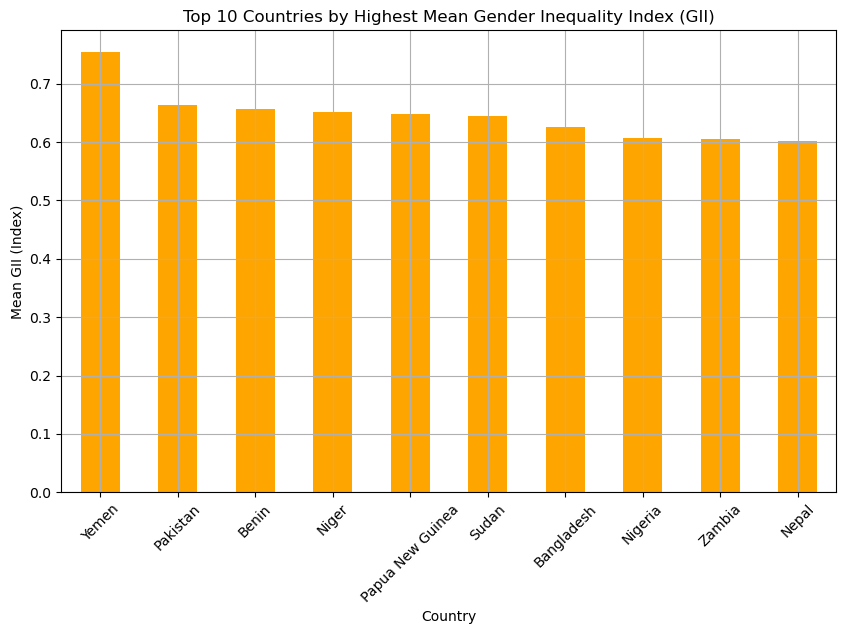

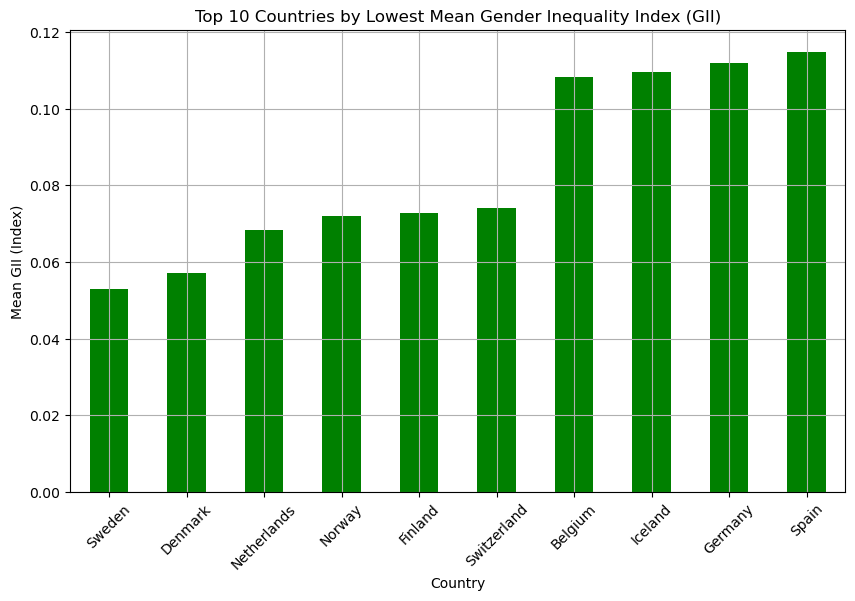

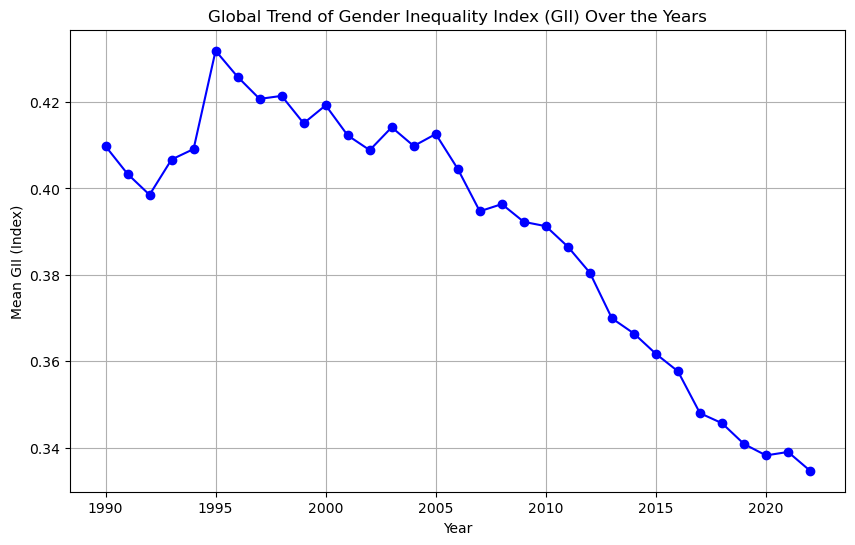

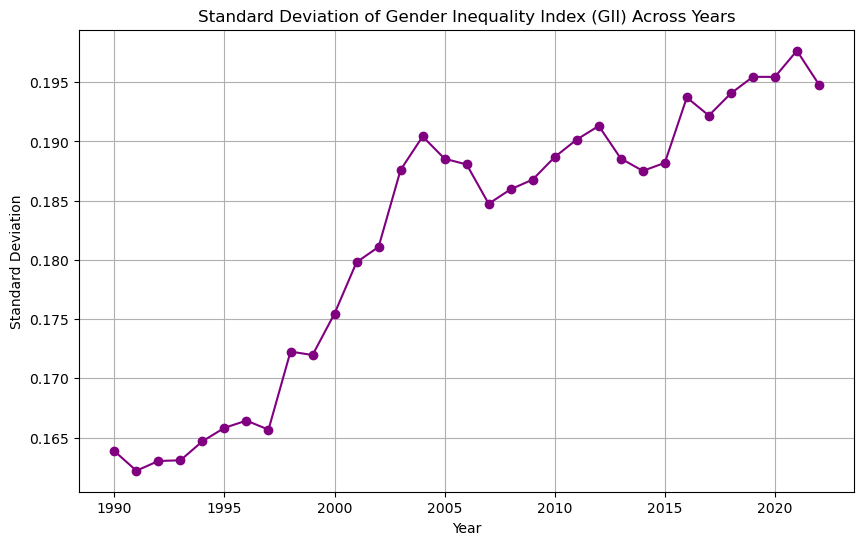

In [8]:
# Step 1: Calculate the mean GII across years for each country
country_means = df_gii_filtered_cleaned.set_index('country')[year_columns].mean(axis=1)

# Top 10 countries with the highest mean GII
top_10_countries = country_means.nlargest(10)

# Bottom 10 countries with the lowest mean GII
bottom_10_countries = country_means.nsmallest(10)

# Step 2: Calculate the global trend (mean GII across all countries for each year)
global_trend = df_gii_filtered_cleaned[year_columns].mean(axis=0)

# Step 3: Calculate the standard deviation of GII across years
std_across_years = df_gii_filtered_cleaned[year_columns].std(axis=0)

# Plot the top 10 countries by mean GII
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Highest Mean Gender Inequality Index (GII)')
plt.xlabel('Country')
plt.ylabel('Mean GII (Index)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plot the bottom 10 countries by mean GII
plt.figure(figsize=(10, 6))
bottom_10_countries.plot(kind='bar', color='green')
plt.title('Top 10 Countries by Lowest Mean Gender Inequality Index (GII)')
plt.xlabel('Country')
plt.ylabel('Mean GII (Index)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plot the global trend across years
plt.figure(figsize=(10, 6))
global_trend.plot(kind='line', marker='o', color='blue')
plt.title('Global Trend of Gender Inequality Index (GII) Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean GII (Index)')
plt.grid()
plt.show()

# Plot the standard deviation across years
plt.figure(figsize=(10, 6))
std_across_years.plot(kind='line', marker='o', color='purple')
plt.title('Standard Deviation of Gender Inequality Index (GII) Across Years')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.grid()
plt.show()


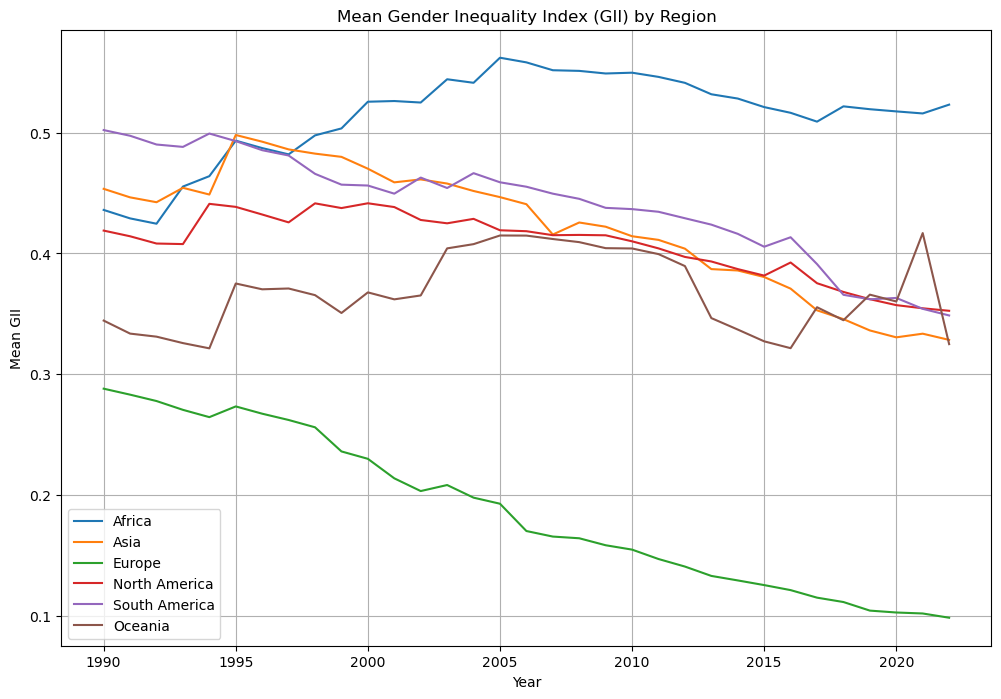

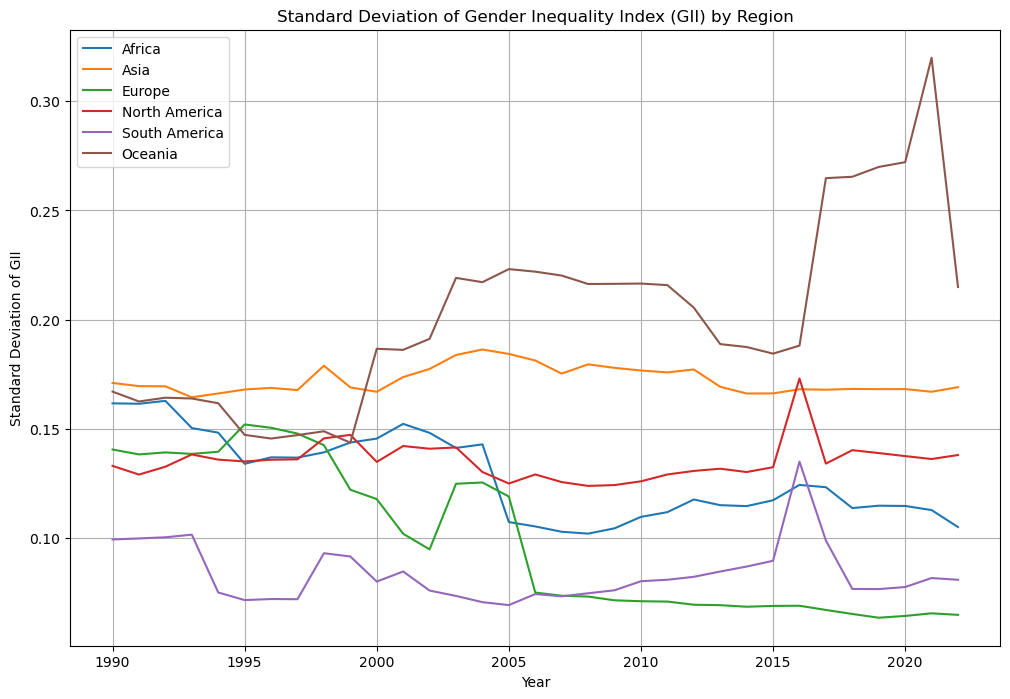

In [9]:
# Define regions (lists of countries)
# Define continents
regions = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde",
        "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo", "Djibouti",
        "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia",
        "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia",
        "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco",
        "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
        "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan",
        "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei",
        "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq",
        "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon",
        "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman",
        "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea",
        "Sri Lanka", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan",
        "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
    ],
    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland",
        "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia",
        "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro",
        "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia",
        "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland",
        "Ukraine", "United Kingdom"
    ],
    "North America": [
        "Canada", "United States", "Mexico", "Cuba", "Jamaica", "Haiti", "Dominican Republic",
        "Guatemala", "Honduras", "El Salvador", "Nicaragua", "Costa Rica", "Panama"
    ],
    "South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana",
        "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
    ],
    "Oceania": [
        "Australia", "New Zealand", "Fiji", "Papua New Guinea", "Samoa", "Tonga", "Vanuatu"
    ]
}


# Helper function to calculate mean and standard deviation for each region
def calculate_region_stats(region_countries):
    region_data = df_gii_filtered_cleaned[df_gii_filtered_cleaned['country'].isin(region_countries)]
    region_mean = region_data[year_columns].mean(axis=0)
    region_std = region_data[year_columns].std(axis=0)
    return region_mean, region_std

# Initialize dictionaries to store results
region_means = {}
region_stds = {}

# Calculate statistics for each region
for region_name, countries in regions.items():
    mean, std = calculate_region_stats(countries)
    region_means[region_name] = mean
    region_stds[region_name] = std

# Plot mean trends for all regions
plt.figure(figsize=(12, 8))
for region, mean in region_means.items():
    mean.plot(label=region)
plt.title('Mean Gender Inequality Index (GII) by Region')
plt.xlabel('Year')
plt.ylabel('Mean GII')
plt.legend()
plt.grid()
plt.show()

# Plot standard deviation trends for all regions
plt.figure(figsize=(12, 8))
for region, std in region_stds.items():
    std.plot(label=region)
plt.title('Standard Deviation of Gender Inequality Index (GII) by Region')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of GII')
plt.legend()
plt.grid()
plt.show()


In [10]:
# df_gii_filtered_cleaned.to_csv("df_gii_filtered_cleaned.csv", index=False)